<a href="https://colab.research.google.com/github/Ktejaswi45/House-Price-Prediction/blob/main/HousePricePrediction_MLipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Housing.csv to Housing.csv
dict_keys(['Housing.csv'])
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>


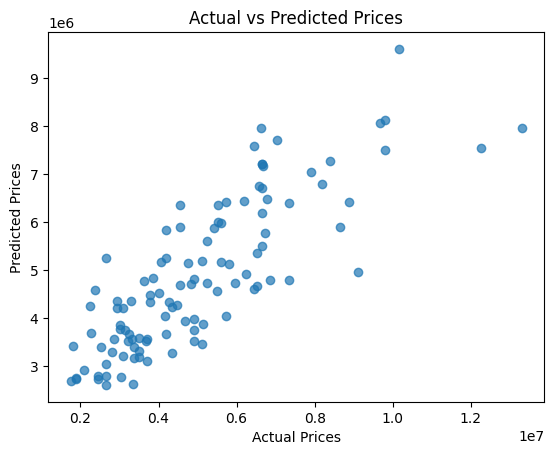

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from google.colab import files
import io  # Import io for handling file uploads

# Upload the dataset
uploaded = files.upload()

# Check the keys to confirm the uploaded file name
print(uploaded.keys())  # This will show the actual uploaded file name

# Load the CSV file after upload (use the correct filename)
# Use the correct file name from the print statement
data = pd.read_csv(io.BytesIO(uploaded['Housing.csv']))  # Correct filename

# Display basic information about the dataset
print(data.head())  # Shows the first few rows
print(data.info())  # Shows the summary of the dataset (column names, types, non-null counts)

# Preprocess the data
# Convert categorical features to dummy variables (if any)
data = pd.get_dummies(data, drop_first=True)

# Check if 'price' exists as a column and update accordingly
if 'price' not in data.columns:
    print("Column 'price' not found. Please check the column name.")
else:
    # Define features (X) and target (y)
    X = data.drop('price', axis=1)  # Make sure 'price' exists
    y = data['price']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")

    # Visualize actual vs predicted prices
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Actual vs Predicted Prices')
    plt.show()
